In [4]:
%matplotlib inline

In [5]:
#format the book
import book_format
import kf_book.book_plots as book_plots
import numpy as np
book_format.set_style()

# [1. Ideas]

 * Signal vs Noise // Regime Change vs Outlier
 * Noise Cancelling
 * Prdiction Error vs Measurement Error
 * The Meaning of Bayes' Theorem
$$ updated\,knowledge = \big\|likelihood\,of\,new\,knowledge\times prior\, knowledge \big\|$$

"Bayes' Theorem provides a way to revise existing predictions or theories (update probabilities) given new or additional evidence."

$$P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}$$
- **Prior Probability**: $P(A)$ ----- Original
- **Posterior Probability**: $P(A \mid B)$ ----- Updated

(example) in Die Casting. A = event of 6, B = event of even numbers.
$$P(A \mid B) = 1/3$$
$$P(A) = 1/6, P(B) = 1/2, P(B \mid A) = 1$$
$$\frac{P(B \mid A)\, P(A)}{P(B)} = \frac{1\, *(1/6)}{1/2} = 1/3$$
- **Prior Probability**: $P(A)$ = 1/6
- **Posterior Probability**: $P(A \mid B)$ = 1/3
- **Prior < Posterior**: $P(A)$ < $P(A \mid B)$ 

Complement of above, if A is False

$$P(A=False \mid B) = 2/3$$
$$P(A=False) = 5/6, P(B) = 1/2, P(B \mid A = False) = 2/5$$
$$\frac{P(B \mid A = False)\, P(A=False)}{P(B)} = \frac{(2/5)\, *(5/6)}{1/2} = 2/3$$
- **Prior Probability**: $P(A=False)$ = 5/6
- **Posterior Probability**: $P(A=False \mid B)$ = 2/3
- **Prior > Posterior**: $P(A=False)$ > $P(A=False \mid B)$ 

What if B is False, too? 

$$P(A=False \mid B=False) = 1$$
$$P(A=False) = 5/6, P(B=False) = 1/2, P(B=False \mid A = False) = 3/5$$
$$\frac{P(B= False  \mid A = False)\, P(A=False)}{P(B= False )} = \frac{(3/5)\, *(5/6)}{1/2} = 1$$
- **Prior Probability**: $P(A=False)$ = 5/6
- **Posterior Probability**: $P(A=False \mid B=False)$ = 1
- **Prior < Posterior**: $P(A=False)$ < $P(A=False \mid B=False)$ 

**[Conclusion]** In Bayesian statistics, **the posterior probabilities can be either larger or smaller** than the prior probabilities depending on the evidence observed. 

# [2. Filters]

 * (1) <span style="color:skyblue;">**Time Domain Filters**</span>: MA, EMA
 * (2) <span style="color:orange;">**Frequency Domain Filters**</span>: Fourier Transform Based
 * (3) <span style="color:orange;">**Adaptive Filters**</span>: LMS(Least Mean Squares) and others
 * (4) <span style="color:orange;">**State Space Based Filters**</span>: Kalman Filter, Particle Filter
 * For what <span style="color:orange;">**in Finance?**</span> Time Series Prediction, Handling Missing Data, Covariance Estimation etc. 

**[State Space Model]**
 * State space models originate from the need to express higher-order differential equations.
 
   State Equation: $\dot{x}(t) = Ax(t) + Bu(t)$  
   Output Equation: $y(t) = Cx(t) + Du(t)$
 * Hidden State vs Observable Measurement
 * Process Model for Prediction vs Measurement Update for Estimation: Predictor Correctors 

**[with Bayesian Statistics]**
* Prior -> Prediction
* Evidence -> Measurement
* Posterior -> Update

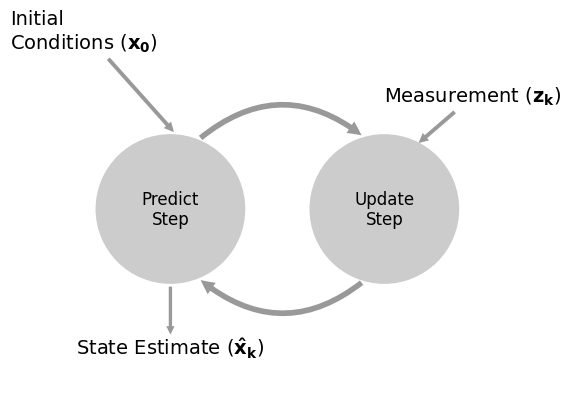

In [6]:
book_plots.predict_update_chart()

**[Kalman Filter]** Prediction -> Measurement -> Update

Makes a prediction, takes a measurement, and then forms a new estimate somewhere between the two with modelling errors based on Gaussian. 

*There are other state space models based on non-Bayesian statistics. Also T-distribution Kalman Filter(Robust Kalman Filter) exists. 

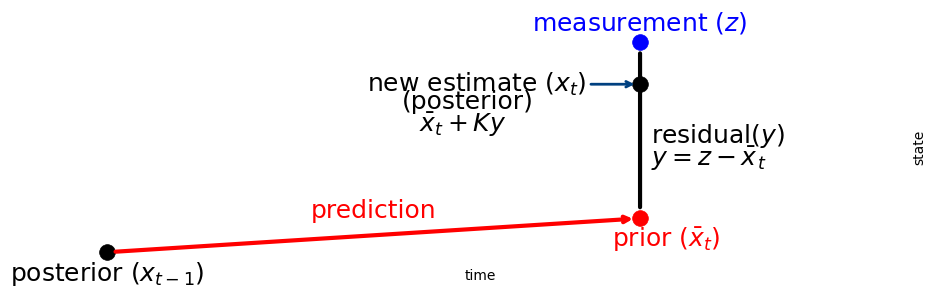

In [7]:
book_plots.show_residual_chart()

In [8]:
from collections import namedtuple
import kf_book.mkf_internal as mkf_internal
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: '𝒩(μ={:.2f}, 𝜎²={:.2f}²)'.format(s[0], np.sqrt(s[1]))

 * x: the state
 * z: the measurement 
 * R: the measurement Noise ~ $\mathcal{N}(\mu_z, \sigma_z^2)$
 * Q: the process Noise ~ $\mathcal{N}(\bar\mu, \bar\sigma^2)$
 * P: the variance of the state ~ $\mathcal N(\mu, \sigma^2)$

For a linear Kalman Filter 

$$\begin{aligned}
\mathcal N(\mu, \sigma^2) &= \| prior \cdot likelihood \|\\
&= \| \mathcal{N}(\bar\mu, \bar\sigma^2)\cdot \mathcal{N}(\mu_z, \sigma_z^2) \|\\
&= \mathcal N(\frac{\bar\sigma^2 \mu_z + \sigma_z^2 \bar\mu}{\bar\sigma^2 + \sigma_z^2},\frac{\bar\sigma^2\sigma_z^2}{\bar\sigma^2 + \sigma_z^2})
\end{aligned}$$
 
If the measurement is nine times more accurate than the prior, then $\bar\sigma^2 = 9\sigma_z^2$, and

$$\begin{aligned}
\mu&=\frac{9 \sigma_z^2 \mu_z + \sigma_z^2\, \bar\mu} {9 \sigma_z^2 + \sigma_\mathtt{z}^2} \\
&= \left(\frac{9}{10}\right) \mu_z + \left(\frac{1}{10}\right) \bar\mu
\end{aligned}
$$

 * State Estimation: scaling the measurement and the prior(prediction) by weights
 
 $$\begin{aligned}
\mu &= \bar\mu + K(\mu_z - \bar\mu)
\end{aligned}$$
 
 * K: Kalman gain. Variance vs Confidence
$$K = \frac {\bar\sigma^2}{\bar\sigma^2 + \sigma_z^2}$$


## Linear Kalman Filter Example

```python
predict(x, P, u, Q)
```
For the state $\mathcal N(10, 3)$ and the movement $\mathcal N(1, 4)$. 
Predicted position: 11 (10+1) with a variance of 7 (3+4).

```python
update(x, P, z, R)
```
with Measurment: $\mathcal N(12, 3.5^2)$

In [9]:
import filterpy.kalman as kf
x = gaussian(10., 3)
print(f'Initial State: {x}')
print(f'Movement: {gaussian(1., 4.)}')

x, P = kf.predict(x=10., P=3., u=1., Q=2.**2)
# print(f'{x:.3f} {P:.3f}')
prediction = gaussian(x, P)
print(f'Prediction: {prediction}')

print(f'Measurement: {gaussian(12., 3.5**2)}')

x, P = kf.update(x=x, P=P, z=12., R=3.5**2)
estimate = gaussian(x, P)
print(f'Estimation(Update): {estimate} -> becomes the Next Initial State')

Initial State: 𝒩(μ=10.00, 𝜎²=1.73²)
Movement: 𝒩(μ=1.00, 𝜎²=2.00²)
Prediction: 𝒩(μ=11.00, 𝜎²=2.65²)
Measurement: 𝒩(μ=12.00, 𝜎²=3.50²)
Estimation(Update): 𝒩(μ=11.36, 𝜎²=2.11²) -> becomes the Next Initial State


## The Extension of Kalman Filter

Matrix -> Linear Algebra -> Limitations of the original Kalman Filter: only for the linear problems. 
* **(1) Extended Kalman Filter(EKF)**: linearizes the differential equations at one point, which requires you to find a solution to a matrix of partial derivatives (a Jacobian).
* **(2) Unscented Kalman Filter(UKF)**: It is easier to approximate a distribution than to approximate an arbitrary nonlinear function.Sigma points + Unscented Transform. 
* **(3) Particle Filter(Sequential Monte Carlo Method)**: use *Monte Carlo* techniques - generates thousands to tens of thousands of random points and tests all of them against the measurements. It then probabilistically kills or duplicates points based on how well they match the measurements. 

## Unscented Kalman Filter(UKF)

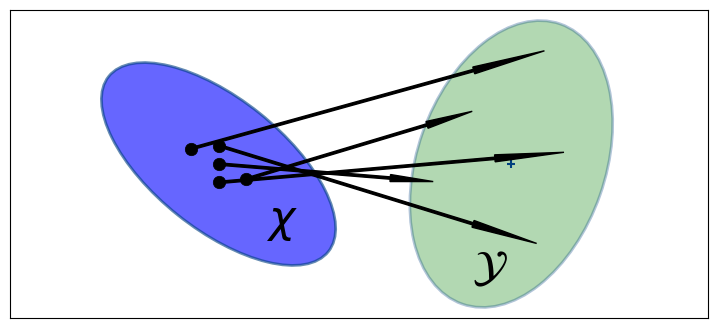

In [10]:
import kf_book.ukf_internal as ukf_internal
ukf_internal.show_sigma_transform(with_text=True)

### Sigma Points - Sampleing from a Distribution

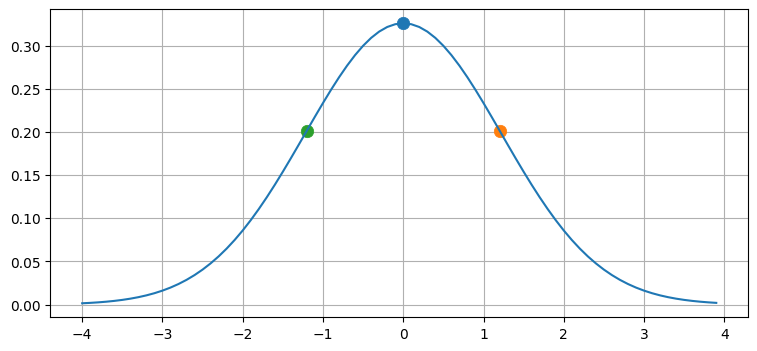

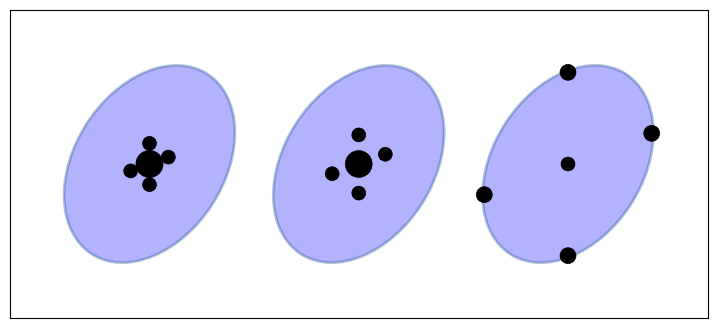

In [11]:
ukf_internal.show_3_sigma_points()
ukf_internal.show_sigma_selections()

### Sigma Point Computation

The first sigma point is the mean of the input. This is the sigma point displayed in the center of the ellipses in the diagram above. We will call this $\boldsymbol{\chi}_0$.

$$ \mathcal{X}_0 = \mu$$

For notational convenience we define $\lambda = \alpha^2(n+\kappa)-n$, where $n$ is the dimension of $\mathbf x$. The remaining sigma points are computed as

$$ 
\boldsymbol{\chi}_i = \begin{cases}
\mu + \left[ \sqrt{(n+\lambda)\Sigma}\right ]_{i}& i=1..n \\
\mu - \left[ \sqrt{(n+\lambda)\Sigma}\right]_{i-n} &i=(n+1)..2n\end{cases}
$$
The $i$ subscript chooses the ith row vector of the matrix. 

We can define **the square root as the matrix S**, which when multiplied by its transpose, returns $\Sigma$:

$$
\Sigma = \mathbf{SS}^\mathsf T
$$

This definition is favored because $\mathbf S$ is computed using the [*Cholesky decomposition*](https://en.wikipedia.org/wiki/Cholesky_decomposition) 

### Weight Computation

This formulation uses one set of weights for the means, and another set for the covariance. The weights for the mean of $\mathcal{X}_0$ is computed as

$$W^m_0 = \frac{\lambda}{n+\lambda}$$

The weight for the covariance of $\mathcal{X}_0$ is

$$W^c_0 = \frac{\lambda}{n+\lambda} + 1 -\alpha^2 + \beta$$

The weights for the rest of the sigma points $\boldsymbol{\chi}_1 ... \boldsymbol{\chi}_{2n}$ are the same for the mean and covariance. They are

$$W^m_i = W^c_i = \frac{1}{2(n+\lambda)}\;\;\;i=1..2n$$

In [12]:
import numpy as np

# Parameters for the normal distribution
mu = 0
sigma = 1
n = 1  # Dimension of the state
kappa = 3 - n  # Common choice for kappa

# Calculating sigma points
sigma_points = np.array([mu, mu + np.sqrt((n + kappa) * sigma**2), mu - np.sqrt((n + kappa) * sigma**2)])

# Calculate the weights for the mean and covariance
weight_mean = np.array([kappa / (n + kappa), 0.5 / (n + kappa), 0.5 / (n + kappa)])
weight_cov = weight_mean  # For simplicity, use the same weights for covariance

# Calculate the mean and standard deviation of the sigma points
mean_calculated = np.sum(weight_mean * sigma_points)
variance_calculated = np.sum(weight_cov * (sigma_points - mean_calculated)**2)
std_dev_calculated = np.sqrt(variance_calculated)

mean_calculated, std_dev_calculated


(0.0, 0.9999999999999999)

## Simulation: 5MA vs LSM vs KF vs UKF

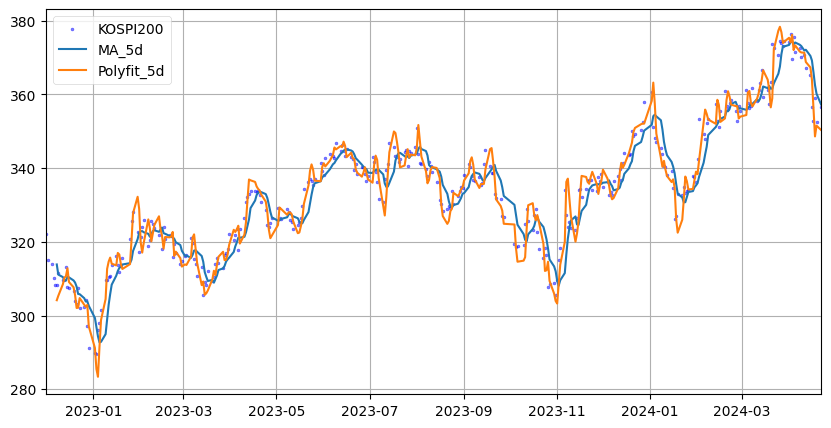

[Residuals of MA_5d]
Median of Residuals: 0.3903
Standard Deviation of Residuals: 4.9117
Maximum Residual: 22.6360
Minimum Residual: -13.2540
Coefficient of Determination (R²): 0.9170


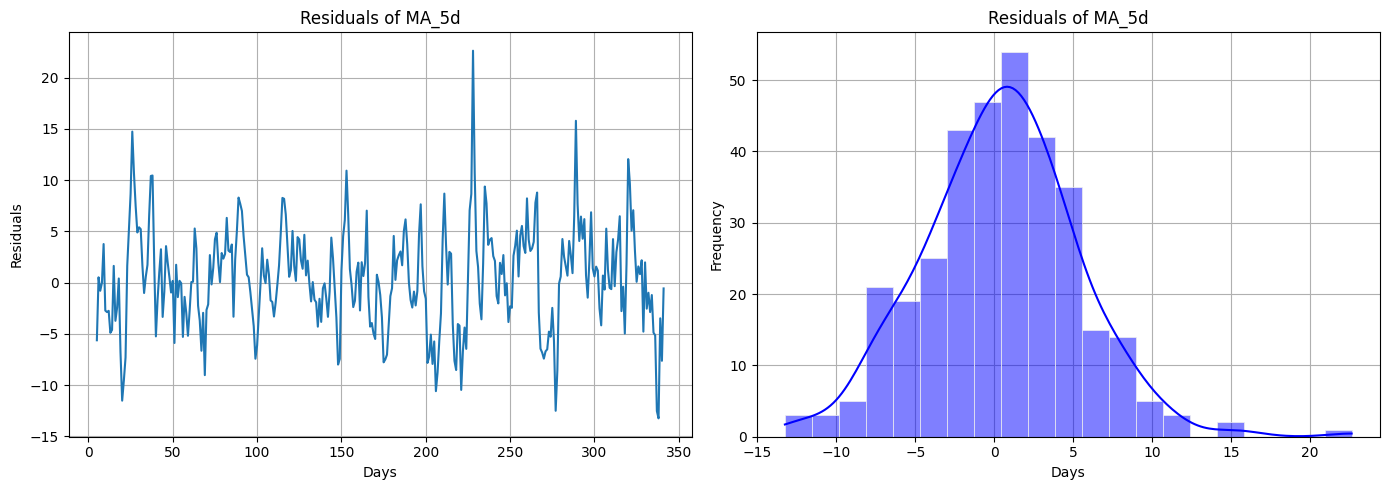

[Residuals of Polyfit_5d]
Median of Residuals: 0.0316
Standard Deviation of Residuals: 4.2575
Maximum Residual: 14.6880
Minimum Residual: -13.1600
Coefficient of Determination (R²): 0.9433


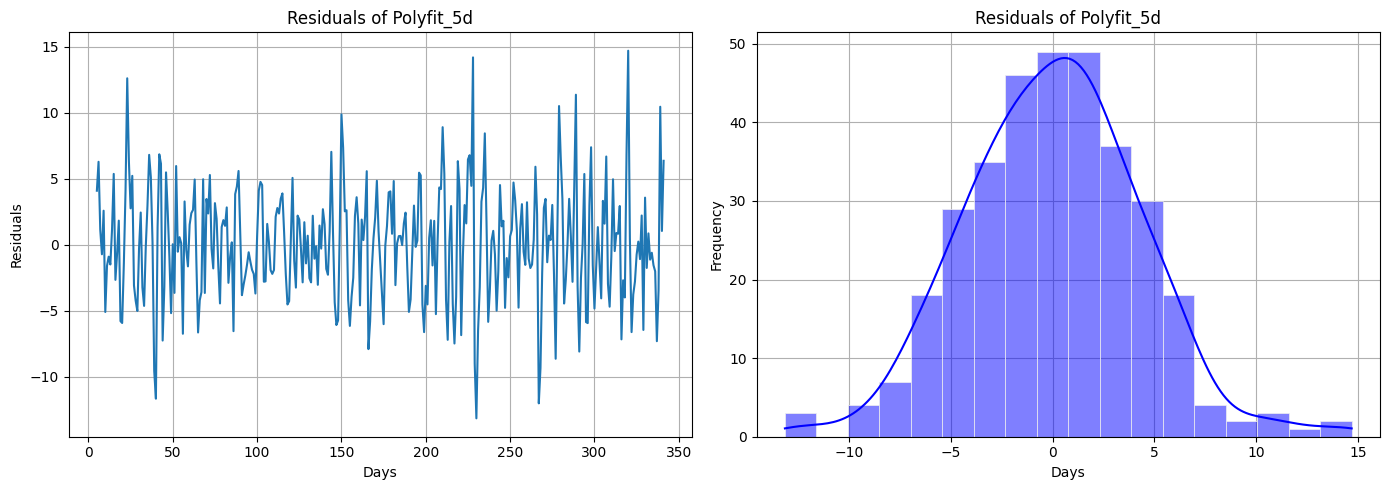

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel
data = pd.read_excel('kospi2.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data['MA_5d'] = data['KOSPI200'].shift(1).rolling(window=5).mean()

def apply_polyfit(data, degree=1):
    # Filter out NaN values which numpy cannot handle in polyfit
    clean_data = data[~np.isnan(data)]
    
    # Ensure there's enough data to fit the polynomial
    if len(clean_data) >= 5:
        # Fit a polynomial of specified degree to the data
        coeffs = np.polyfit(range(len(clean_data[-5:])), clean_data[-5:], degree)
        # Predict the next value based on the polynomial fit
        return np.polyval(coeffs, len(clean_data[-5:]))
    else:
        return np.nan

data['Polyfit_5d'] = data['KOSPI200'].shift(1).rolling(window=5).apply(apply_polyfit, raw=True)

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(data['Date'], data['KOSPI200'], alpha=0.5, s=4, label='KOSPI200', color='blue')
plt.plot(data['Date'], data['MA_5d'], label='MA_5d')
plt.plot(data['Date'], data['Polyfit_5d'], label='Polyfit_5d')
ax = plt.gca()
ax.set_xlim([data['Date'].min(), data['Date'].max()])
plt.legend()  # Show legend
plt.grid(True)  # Enable grid
plt.show()

from kf_book.book_plots import plot_residual_limits, set_labels
import seaborn as sns

def set_labels(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def plot_residuals_exKF(xs, data, title, y_label):
    res = xs - data
    print(f'[{title}]')    
    print(f'Median of Residuals: {res.mean():.4f}')
    print(f'Standard Deviation of Residuals: {res.std():.4f}')
    print(f'Maximum Residual: {res.max():.4f}')
    print(f'Minimum Residual: {res.min():.4f}')

    # Calculate SSR (Sum of Squares of Residuals)
    SSR = (res ** 2).sum()    
    # Calculate SST (Total Sum of Squares)
    mean_data = data.mean()
    SST = ((data - mean_data) ** 2).sum()    
    # Calculate R²
    R_squared = 1 - (SSR / SST)
    
    print(f'Coefficient of Determination (R²): {R_squared:.4f}')

    # Set up the figure and subplots
    plt.figure(figsize=(14, 5))  # Adjust the figure size to give enough space for both plots

    # First subplot for the line plot of residuals
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.plot(res)
    set_labels(title, 'Days', y_label)
    plt.grid(True)  # Optional: Add grid for better readability

    # Second subplot for the histogram of residuals
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    sns.histplot(res, kde=True, color='blue')
    set_labels(title, 'Days', 'Frequency')            
    plt.grid(True)  # Optional: Add grid for better readability

    plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
    plt.show() 

plot_residuals_exKF(data['KOSPI200'], data['MA_5d'], 'Residuals of MA_5d', 'Residuals')
plot_residuals_exKF(data['KOSPI200'], data['Polyfit_5d'], 'Residuals of Polyfit_5d', 'Residuals')

[Residuals of KF]
Median of Residuals: 0.0004
Standard Deviation of Residuals: 3.9481
Maximum Residual: 12.8769
Minimum Residual: -12.3463
Coefficient of Determination (R²): 0.9509


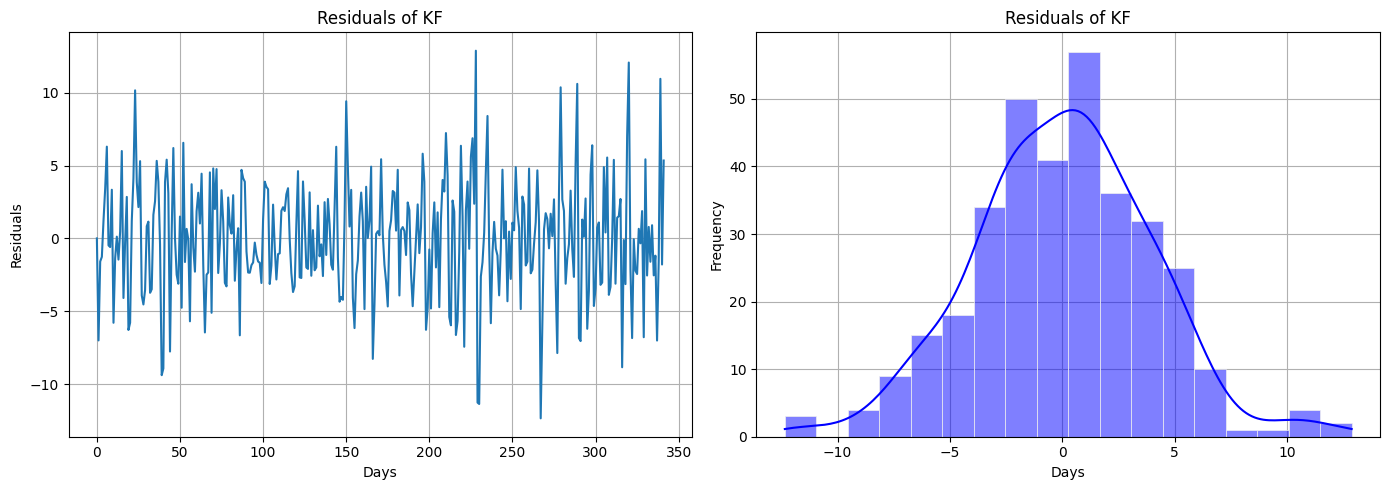

In [13]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

def pos_vel_filter(x, P, R, Q=0., dt=1.0):
    """ Returns a KalmanFilter which implements a
    constant velocity model for a state [x dx].T
    """
    
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([x[0], x[1]]) # location and velocity
    kf.F = np.array([[1., dt],
                     [0.,  1.]])  # state transition matrix
    kf.H = np.array([[1., 0]])    # Measurement function
    kf.R *= R                     # measurement uncertainty
    if np.isscalar(P):
        kf.P *= P                 # covariance matrix 
    else:
        kf.P[:] = P               # [:] makes deep copy
    if np.isscalar(Q):
        kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q)
    else:
        kf.Q[:] = Q
    return kf

dt = 1.0
x = np.array([322.02, 0.])
P = np.diag([4.75, 0.5])
F = np.array([[1., dt],
              [0.,  1.]])
kf = pos_vel_filter(x=x, P=P, R=4.75, Q=2, dt=dt)
xs, _, _, _ = kf.batch_filter(data['KOSPI200'])
original_array = xs @ F [0]
original_kf = np.insert(original_array, 0, 322.02)[:-1]
plot_residuals_exKF(data['KOSPI200'], original_kf, 'Residuals of KF', 'Residuals')

[Residuals of KF(Second Order)]
Median of Residuals: 0.0259
Standard Deviation of Residuals: 4.8196
Maximum Residual: 14.3290
Minimum Residual: -19.3749
Coefficient of Determination (R²): 0.9284


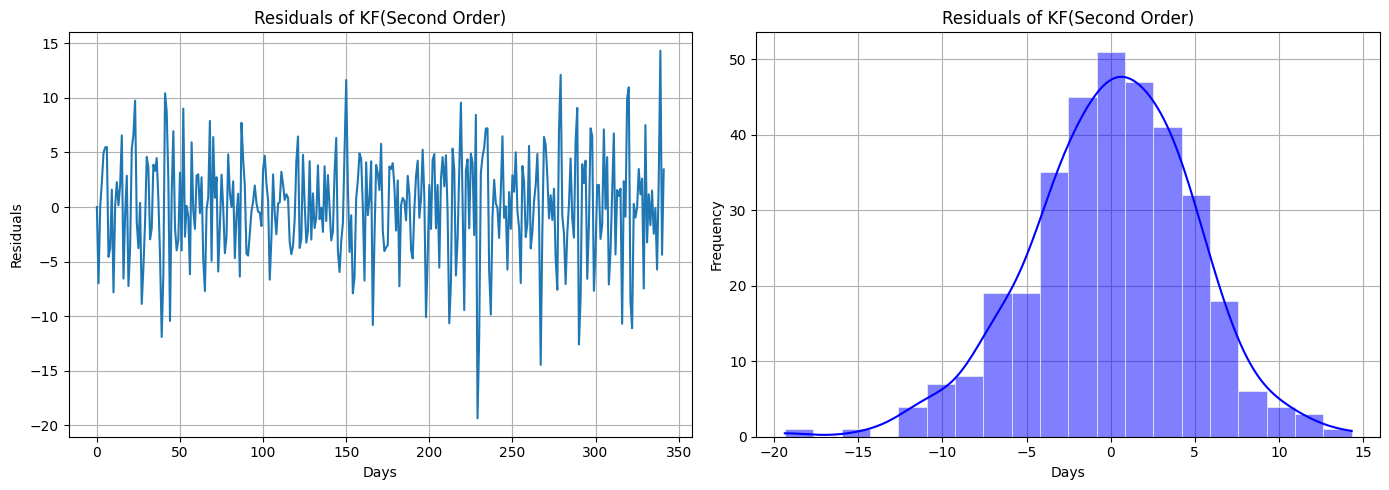

In [14]:
def SecondOrderKF(x, R, Q, dt, P=4.75):
    """ Create second order Kalman filter. 
    Specify R and Q as floats."""
    
    kf = KalmanFilter(dim_x=3, dim_z=1)    
    kf.x = np.array([x[0], x[1], x[2]])
    kf.P[0, 0] = P
    kf.P[1, 1] = 1
    kf.P[2, 2] = 1
    kf.R *= R**2
    kf.Q = Q_discrete_white_noise(3, dt, Q)
    kf.F = np.array([[1., dt, .5*dt*dt],
                     [0., 1.,       dt],
                     [0., 0.,       1.]])
    kf.H = np.array([[1., 0., 0.]])
    return kf

dt = 1.0
x = np.array([322.02, 0., 0.])
P = 4.75
F = np.array([[1., dt, .5*dt*dt],
              [0., 1.,       dt],
              [0., 0.,       1.]])
kf = SecondOrderKF(x=x, P=P, R=4.75, Q=4.75, dt=dt)
xs, _, _, _ = kf.batch_filter(data['KOSPI200'])
original_array = xs @ F [0]
so_kf = np.insert(original_array, 0, 322.02)[:-1]
plot_residuals_exKF(data['KOSPI200'], so_kf, 'Residuals of KF(Second Order)', 'Residuals')

[Residuals of UKF]
Median of Residuals: -0.0777
Standard Deviation of Residuals: 4.7128
Maximum Residual: 23.7978
Minimum Residual: -11.2635
Coefficient of Determination (R²): 0.9327


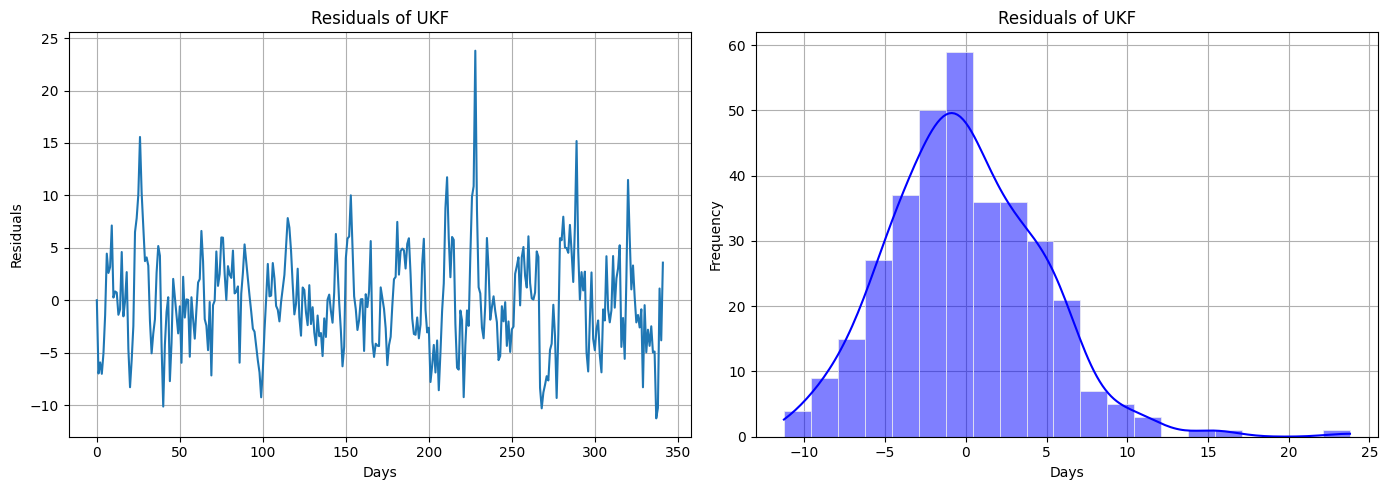

In [15]:
from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise
import sys

def f_nonlinear(x, dt):  
    x[0] += x[1]*dt    
    x[2] += x[3]*dt
    x[1] = x[1]
    x[3] = x[3]
    return x

def cv_UKF(fx, hx, R_std):
    points = MerweScaledSigmaPoints(n=4, alpha=.1, beta=2., kappa=-1.)
    kf = UnscentedKalmanFilter(4, len(R_std), dt, fx=fx, hx=hx, points=points)

    kf.Q[0:2, 0:2] = Q_discrete_white_noise(2, dt=dt, var=0.1)        
    kf.Q[2:4, 2:4] = Q_discrete_white_noise(2, dt=dt, var=0.1)        
    kf.R = np.diag(R_std)
    kf.R = kf.R @ kf.R  # square to get variance
    kf.x = np.array([322., 0, 130000000, 0.])
    kf.P = np.diag([4.75, 1, 10000, 100.])
    return kf

def h_nonlinear(x):
    return x[[0, 2]]

dt = 1.
price_std = 4.75
volume_std = 1000

ukf = cv_UKF(f_nonlinear, h_nonlinear, R_std=[price_std, volume_std])

zs = []
for i in range(len(data)):
    z = np.array([data['KOSPI200'][i], data['volume'][i]])
    zs.append(z)

xs, covs = ukf.batch_filter(zs)
original_array = xs[:, 0] + xs[:, 1] * dt
ukf_result = np.insert(original_array, 0, 322.02)[:-1]
plot_residuals_exKF(data['KOSPI200'], ukf_result, 'Residuals of UKF', 'Residuals')

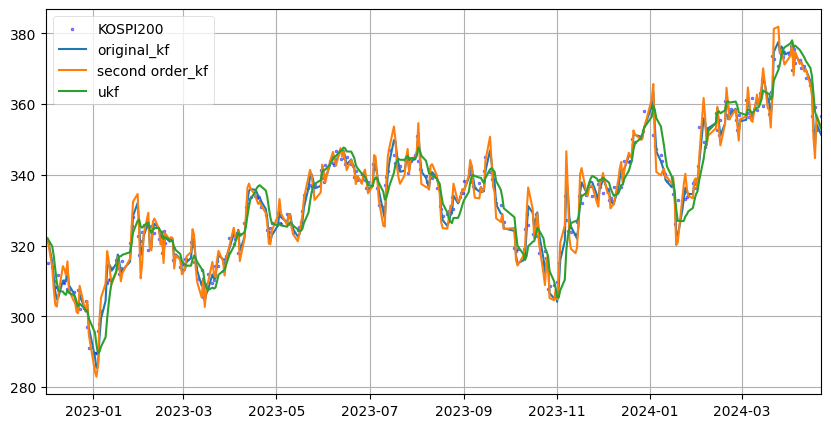

In [16]:
plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(data['Date'], data['KOSPI200'], alpha=0.5, s=4, label='KOSPI200', color='blue')
plt.plot(data['Date'], original_kf, label='original_kf')
plt.plot(data['Date'], so_kf, label='second order_kf')
plt.plot(data['Date'], ukf_result, label='ukf')
ax = plt.gca()
ax.set_xlim([data['Date'].min(), data['Date'].max()])
plt.legend()  # Show legend
plt.grid(True)  # Enable grid
plt.show()

| Residual | MA_5d  | Polyfit_5d | KF_1st  | KF_2nd  | UKF    |
|----------|--------|------------|---------|---------|--------|
| Median   | 0.3903 | 0.0316     | 0.0004  | 0.0259  | -0.0777|
| SD       | 4.9117 | 4.2575     | 3.9481  | 4.8196  | 4.7128 |
| Max      | 22.636 | 14.68      | 12.8769 | 14.329  | 23.7978|
| Min      | -13.254| -13.16     | -12.3463| -19.3749| -11.2635|
| R²       | 0.917  | 0.9433     | 0.9509  | 0.9284  | 0.9327 |

### Conclusion

* (1) The Kalman Filter may be **useful, not omnipotent**: It is sensitive to parameter settings, which necessitates **adaptive filtering**. 
* (2) A higher order or a fancy model do not guarantee better performance: It depends on the characteristics of the data.
* (3) Other filtering techniques, such as the **Particle Filter and FFT**, and other applications like **parameter estimation, handling missing data** etc.  will be introduced later. 
